In [2]:
# Step 1: Load and Explore the Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Load the datasets(jupyter notebook)
# df_train1 = pd.read_csv("/Users/rao/Downloads/fraud_det_data/train_identity.csv")
# df_train2 = pd.read_csv("/Users/rao/Downloads/fraud_det_data/train_transaction.csv")
# df_test1 = pd.read_csv("/Users/rao/Downloads/fraud_det_data/test_identity.csv")
# df_test2 = pd.read_csv("/Users/rao/Downloads/fraud_det_data/test_transaction.csv")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df_train1 = pd.read_csv("/content/train_identity.csv")
df_train2 = pd.read_csv("/content/train_transaction.csv")
df_test1 = pd.read_csv("/content/test_identity.csv")
df_test2 = pd.read_csv("/content/train_transaction.csv")

Mounted at /content/drive


In [4]:
#merge the training and testing dataframes
df_train = df_train2.merge(df_train1,how = 'left',left_index=True,right_index=True)
df_test = df_test2.merge(df_test1, how = 'left',left_index=True,right_index=True)


In [5]:
df_train

,TransactionID_x,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27319,3014319,0,686823,9.911,C,3489,277.0,144.0,visa,226.0,...,opera 49.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
27320,3014320,0,686845,226.000,W,18227,583.0,150.0,visa,226.0,...,firefox 52.0,NaN,NaN,NaN,F,T,T,T,desktop,rv:52.0
27321,3014321,0,686847,75.469,C,9917,142.0,185.0,visa,138.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
27322,3014322,0,686852,444.950,W,9803,583.0,150.0,visa,226.0,...,safari generic,24.0,1440x900,match_status:2,T,F,F,F,desktop,MacOS


In [6]:
#Explore the training set
df_train.describe()

,TransactionID_x,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,2.732400e+04,27324.000000,27324.000000,27324.000000,27324.000000,26955.000000,27323.000000,27206.000000,25585.000000,25585.000000,...,26422.000000,8286.000000,26416.000000,26412.000000,1034.000000,1038.000000,965.000000,1026.000000,1038.000000,19556.000000
mean,3.000662e+06,0.029095,383742.268482,131.036578,9867.069426,359.160675,152.594847,200.707087,292.062224,86.072113,...,178.569828,14.009534,362.251893,385.797857,400.762089,15.673410,13.221762,328.853801,151.032755,26.441808
std,7.887904e+03,0.168077,177361.495248,220.511588,4857.713257,158.987059,10.251963,39.854794,104.054931,5.599929,...,26.022669,1.499316,146.343264,154.677856,210.539554,6.325035,2.144312,108.660582,31.564736,3.704495
min,2.987000e+06,0.000000,86400.000000,0.467000,1009.000000,100.000000,100.000000,100.000000,100.000000,13.000000,...,100.000000,11.000000,100.000000,100.000000,101.000000,14.000000,11.000000,100.000000,100.000000,0.000000
25%,2.993831e+06,0.000000,231241.500000,41.811000,6053.000000,194.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,222.000000,252.000000,14.000000,11.000000,284.000000,121.000000,24.000000
50%,3.000662e+06,0.000000,400369.500000,68.950000,9521.000000,360.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,352.000000,391.000000,253.000000,14.000000,15.000000,321.000000,149.000000,24.000000
75%,3.007492e+06,0.000000,523915.750000,125.000000,14065.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,166.000000,15.000000,492.000000,533.000000,596.000000,14.000000,15.000000,403.000000,182.000000,32.000000
max,3.014323e+06,1.000000,686852.000000,4039.960000,18390.000000,600.000000,225.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,670.000000,648.000000,853.000000,41.000000,21.000000,548.000000,216.000000,32.000000


In [7]:
#check for missing values
df_train.isna().sum()

,0
TransactionID_x,0
isFraud,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
...,...
id_36,646
id_37,646
id_38,646
DeviceType,654


In [8]:
# Get the columns with more than 50% missing values
columns_with_many_nulls = df_train.columns[df_train.isna().sum() > len(df_train) / 2]

missing_value_counts = df_train[columns_with_many_nulls].isna().sum()
print(missing_value_counts)

dist1            17826
dist2            25660
R_emaildomain    21980
D4               13887
D5               18024
                 ...  
id_23            26286
id_24            26359
id_25            26298
id_26            26286
id_27            26286
Length: 221, dtype: int64


In [9]:
#lets drop all these columns
df_train.drop(columns_with_many_nulls,axis='columns')

,TransactionID_x,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27319,3014319,0,686823,9.911,C,3489,277.0,144.0,visa,226.0,...,opera 49.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
27320,3014320,0,686845,226.000,W,18227,583.0,150.0,visa,226.0,...,firefox 52.0,NaN,NaN,NaN,F,T,T,T,desktop,rv:52.0
27321,3014321,0,686847,75.469,C,9917,142.0,185.0,visa,138.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
27322,3014322,0,686852,444.950,W,9803,583.0,150.0,visa,226.0,...,safari generic,24.0,1440x900,match_status:2,T,F,F,F,desktop,MacOS


In [10]:
#lets try to do some analysis on the dataset
df_train.ProductCD.value_counts()

,count
ProductCD,
W,19474
H,3215
C,2543
R,1307
S,785


In [11]:
df_train.groupby('ProductCD')['isFraud'].sum().sort_values()

,isFraud
ProductCD,
S,21
R,38
H,55
C,295
W,386


In [12]:
(df_train.groupby('ProductCD')['isFraud'].sum()/df_train.groupby('ProductCD').size())*100

,0
ProductCD,
C,11.600472
H,1.710731
R,2.907422
S,2.675159
W,1.982130


In [13]:
#Product C has the highest percentage of fraud transactions and W has the lowest one

In [14]:
#lets use a label encoder to convert our "object" type columns into numerical
le = LabelEncoder()
for cols in df_train.columns:
    if df_train[cols].dtype == "object":
        df_train[cols] = le.fit_transform(df_train[cols])

In [15]:
#lets impute all the remaining missing values using mode imputation
for column in df_train.columns:
    if df_train[column].isnull().any():
        df_train[column].fillna(df_train[column].mode()[0], inplace=True)

<ipython-input-15-1877c6935004>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[column].fillna(df_train[column].mode()[0], inplace=True)


In [16]:
print(df_train.isna().sum())

TransactionID_x    0
isFraud            0
TransactionDT      0
TransactionAmt     0
ProductCD          0
                  ..
id_36              0
id_37              0
id_38              0
DeviceType         0
DeviceInfo         0
Length: 435, dtype: int64


In [17]:
#dimensionality reduction using PCA
#lets split the data first
X = df_train.drop('isFraud',axis='columns')
y = df_train['isFraud']

#standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

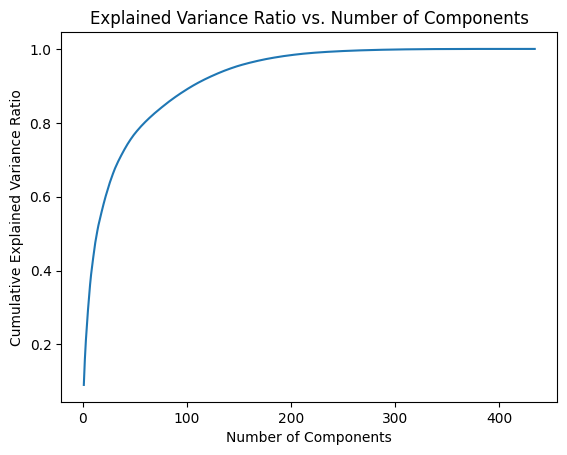

In [18]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

In [19]:
#retain 95% of the variance in our dataset
n_components = np.argmax(cumulative_variance_ratio>=0.95)+1
print(f"Number of components explaining 95% of variance: {n_components}")


Number of components explaining 95% of variance: 145


In [21]:
new_pca = PCA(n_components)
X_pca = new_pca.fit_transform(X_scaled)

columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data=X_pca, columns=columns)

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145
0,-2.251502,0.613877,-0.598547,-0.046910,-0.127031,-0.115883,-0.389963,-0.085798,-1.018265,0.671694,...,-0.214051,0.014996,-0.728426,0.644335,-0.223066,1.158413,0.842243,1.592356,-0.483421,-0.858288
1,-1.193801,0.071282,-0.557401,-0.883636,1.288765,-0.337527,-0.391188,0.492300,-1.357547,0.891049,...,-0.057332,0.302884,0.336471,0.072576,0.149096,-0.614848,-0.329269,-0.177164,0.045544,0.065226
2,-2.975624,0.795984,-0.951425,0.717730,-1.459937,0.175256,-0.800199,-0.890828,-0.608495,0.102813,...,-0.314028,0.645949,0.087052,0.261592,0.977674,0.255033,1.309444,-0.686930,0.733153,0.038295
3,-1.708387,1.513797,4.687661,8.828849,-5.689437,-5.487210,12.203875,7.594159,-1.727633,0.965918,...,-0.073255,-0.851110,-1.665080,-0.656882,0.676016,0.534324,-0.257462,1.674095,-0.928209,1.830776
4,-0.088761,-0.232020,0.540263,-3.165859,6.156110,-1.685203,-1.391381,5.253437,2.215007,-2.738424,...,0.027253,0.358746,0.003719,0.223724,0.037419,-0.422397,-0.330880,0.033032,0.184573,0.084784


In [22]:
df_pca.shape

(27324, 145)

In [23]:
#lets check the feature importance
loadings = new_pca.components_.T * np.sqrt(new_pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(new_pca.n_components_)], index=X.columns)

print(loadings_df)

                      PC1       PC2       PC3       PC4       PC5       PC6  \
TransactionID_x  0.133714 -0.044760  0.029831 -0.003282  0.016363 -0.011358   
TransactionDT    0.133124 -0.042240  0.031347 -0.003030  0.015790 -0.010113   
TransactionAmt  -0.074755  0.086552  0.062718  0.093616 -0.077366 -0.026273   
ProductCD       -0.606815  0.315084  0.004035  0.226239 -0.440634  0.081264   
card1           -0.001381  0.001626 -0.000254  0.012311 -0.002244  0.003460   
...                   ...       ...       ...       ...       ...       ...   
id_36           -0.016512  0.006146 -0.003286 -0.007243  0.006522  0.003541   
id_37           -0.004269  0.000815  0.006718 -0.001130  0.005178 -0.005338   
id_38           -0.012182  0.011258  0.002226 -0.011941 -0.011452  0.001416   
DeviceType      -0.007035  0.000155 -0.000356 -0.003224 -0.005322 -0.000385   
DeviceInfo       0.006570 -0.001634  0.005396 -0.012092  0.005081  0.004791   

                      PC7       PC8       PC9      

In [24]:
#Train and evaluate models

def train_models(X, y, cv=5):
    models = {
        'Logistic Regression': (LogisticRegression(random_state=42, max_iter = 1000), {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
        }),
        'Decision Tree': (DecisionTreeClassifier(random_state=42), {
            'min_samples_leaf': [1, 2, 4]
        }),
        'Random Forest': (RandomForestClassifier(random_state=42), {
            'n_estimators': [100, 200, 300, 500],
        }),
    }

    best_models = {}

    for name, (model, params) in models.items():
        print(f"Training {name}...")
        grid_search = GridSearchCV(model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
        grid_search.fit(X, y)

        best_models[name] = {
            'model': grid_search.best_estimator_,
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_
        }

    return best_models



def evaluate_models(best_models, X, y, cv=5):
    results = {}

    for name, model_info in best_models.items():
        best_model = model_info['model']

        # Perform K-fold cross-validation
        cv_scores = cross_val_score(best_model, X, y, cv=cv, scoring='roc_auc')

        # Make predictions
        y_pred = best_model.predict(X)
        y_pred_proba = best_model.predict_proba(X)[:, 1]

        # Calculate metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        auc_roc = roc_auc_score(y, y_pred_proba)

        results[name] = {
            'Best Parameters': model_info['best_params'],
            'Best Score': model_info['best_score'],
            'Cross-Validation Scores': cv_scores,
            'Mean CV Score': np.mean(cv_scores),
            'Std CV Score': np.std(cv_scores),
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'AUC-ROC': auc_roc
        }

    return results

In [25]:
#lets make a sample of our data to train the models on

sample_size = 5000

# Create a random index for sampling
random_index = np.random.choice(X_pca.shape[0], size=sample_size, replace=False)

# Create the sampled datasets
X_pca_sampled = X_pca[random_index]
y_sampled = y[random_index]

In [26]:
# Lets use our PCA componenets
best_models = train_models(X_pca_sampled, y_sampled, cv=5)
results = evaluate_models(best_models, X_pca_sampled, y_sampled, cv=5)

# Print results
for model, metrics in results.items():
    print(f"\n{model} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...

Logistic Regression Results:
Best Parameters: {'C': 0.001}
Best Score: 0.7576016908340782
Cross-Validation Scores: [0.7174617  0.79517454 0.77223187 0.78893076 0.71420958]
Mean CV Score: 0.7576016908340782
Std CV Score: 0.034932408274037735
Accuracy: 0.9764
Precision: 0.9375
Recall: 0.11363636363636363
F1 Score: 0.20270270270270271
AUC-ROC: 0.8132874554916462

Decision Tree Results:
Best Parameters: {'min_samples_leaf': 4}
Best Score: 0.5656577171490087
Cross-Validation Scores: [0.54525351 0.56728795 0.60653925 0.5451258  0.56408207]
Mean CV Score: 0.5656577171490087
Std CV Score: 0.02242467881445227
Accuracy: 0.9852
Precision: 0.8536585365853658
Recall: 0.5303030303030303
F1 Score: 0.6542056074766355
AUC-ROC: 0.9939913722267871

Random Forest Results:
Best Parameters: {'n_estimators': 500}
Best Score: 0.7507016243178033
Cross-Validation Scores: [0.75931922 0.73594219 0.7644132  0.76217122 0.73166229]


After model evaluation,let's move forward with Random forest considering its superior accuracy, F1 score, and AUC-ROC.

In [28]:
#make predictions on the test set now

df_test.head()

df_test.isna().sum()

,0
TransactionID_x,0
isFraud,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
...,...
id-36,780
id-37,780
id-38,780
DeviceType,805


Our testing data has the same problems our training data had so we need to handle the dataset in the exact same way before we make the predictions on it using our trained model.

In [29]:
#dropping unnecessary columns
df_test.drop(df_test.columns[df_test.isna().sum() > len(df_test) / 2],axis='columns')

#label encoding
for cols in df_test.columns:
    if df_test[cols].dtype == "object":
        df_test[cols] = le.fit_transform(df_test[cols])


#handling missing values
for column in df_test.columns:
    if df_test[column].isnull().any():
        df_test[column].fillna(df_test[column].mode()[0], inplace=True)

<ipython-input-29-ebf83aca8874>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[column].fillna(df_test[column].mode()[0], inplace=True)


In [33]:
print(df_test.shape)
print(df_test.isna().sum())
print(df_test.columns.dtype)

(28215, 435)
TransactionID_x    0
isFraud            0
TransactionDT      0
TransactionAmt     0
ProductCD          0
                  ..
id-36              0
id-37              0
id-38              0
DeviceType         0
DeviceInfo         0
Length: 435, dtype: int64
object


In [34]:
#lets apply pca to our test set
X_test = df_test.drop('isFraud',axis='columns')
y_test = df_test['isFraud']

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X)

X_test_pca = new_pca.fit_transform(X_test_scaled)


In [35]:
#lets get a sample out of our x_pca_test as it is still too big

test_sample_size = 5000

# Create a random index for sampling
random_index = np.random.choice(X_test_pca.shape[0], size=test_sample_size, replace=False)

# Create the sampled datasets
X_test_pca_sampled = X_test_pca[random_index]
y_test_sampled = y_test[random_index]


In [38]:
#lets use our random forest model to make predictions on the test set

best_rf_params = results['Random Forest']['Best Parameters']

final_model = RandomForestClassifier(**best_rf_params, random_state=42)

final_model.fit(X_pca_sampled,y_sampled)

y_pred = final_model.predict(X_test_pca_sampled)

accuracy = accuracy_score(y_test_sampled, y_pred)
precision = precision_score(y_test_sampled, y_pred)
recall = recall_score(y_test_sampled, y_pred)
f1 = f1_score(y_test_sampled, y_pred)

print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1:", f1)

accuracy: 0.9774
precision: 0.9117647058823529
recall: 0.2198581560283688
f1: 0.35428571428571426


**Although the accuracy and precision are both high, having a low recall is problematic for fraud detection as our model is missing many actual fraud cases. However,the cases it is able to flag as fraud are 91% times true as can be shown by the precision. This is an example of a class imbalance problem with our dataset and needs to be handled appropriately using SMOTE. Additionaly, we can also leverage feature engineering to create more discriminative features for fraud detection.**